In [10]:
import pandas as pd
import numpy as np

In [11]:
df_pathway_att = pd.read_csv('../../data/GEP_CellBlind_LUNG_pathway_attention.csv')

df_pathway_att = df_pathway_att[df_pathway_att['cell_line'].isin(['EKVX','HCC827','LCLC103H','LU135','NCIH1299','NCIH146','NCIH1963','NCIH2170','NCIH2228','NCIH526','PC14','RERFLCSQ1'])]
# 重置索引
df_pathway_att = df_pathway_att.reset_index(drop=True)
print(df_pathway_att.shape)
df_pathway_att.head()

(2560, 622)


,drug,cell_line,OncotreeCode,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
0,5-Fluorouracil,HCC827,LUAD,0.001369,0.001426,0.001540,0.002264,0.001739,0.001743,0.001756,...,0.001509,0.001329,0.001365,0.001443,0.001413,0.001735,0.002677,0.001404,0.002237,0.001536
1,5-azacytidine,HCC827,LUAD,0.001556,0.001327,0.001549,0.002153,0.001751,0.001593,0.001424,...,0.001550,0.001314,0.001348,0.001411,0.001411,0.001747,0.002680,0.001549,0.002575,0.001526
2,A-366,HCC827,LUAD,0.001391,0.001622,0.001523,0.001685,0.001708,0.001727,0.001567,...,0.001524,0.001405,0.001509,0.001394,0.001567,0.001561,0.002652,0.001285,0.002561,0.001581
3,ABT737,HCC827,LUAD,0.001371,0.001472,0.001551,0.001253,0.001746,0.001757,0.001596,...,0.001371,0.001404,0.001544,0.001479,0.001595,0.001588,0.002382,0.001216,0.002352,0.001505
4,AGI-5198,HCC827,LUAD,0.001361,0.001451,0.001533,0.001655,0.001740,0.001577,0.001578,...,0.001534,0.001364,0.001502,0.001404,0.001403,0.001734,0.002483,0.001392,0.002451,0.001517


In [12]:
# 将df_LUNG根据cell_line分组，再取每组drug列的交集
df_pathway_att_drug = df_pathway_att.groupby('cell_line')['drug'].apply(set).reset_index()
# 将df_LUNG_drug中的drug取交集
drugs = set.intersection(*df_pathway_att_drug['drug'])
print(len(drugs))
print(drugs)
# 取df_LUNG中drug中在drugs中的数据
df_pathway_att = df_pathway_att[df_pathway_att['drug'].isin(drugs)]
# 去掉drug = ABT737,AZD5582,Dactinomycin,Docetaxel,GSK1904529A,Navitoclax,Paclitaxel,Sabutoclax,Venetoclax
# df_pathway_att = df_pathway_att[~df_pathway_att['drug'].isin(['ABT737','AZD5582','Dactinomycin','Docetaxel','GSK1904529A','Navitoclax','Paclitaxel','Sabutoclax','Venetoclax'])]
# 重置索引
df_pathway_att = df_pathway_att.reset_index(drop=True)
print(df_pathway_att.shape)

144
{'RVX-208', 'Ipatasertib', 'Staurosporine', 'Buparlisib', 'PRIMA-1MET', 'XAV939', 'Bosutinib', 'AZD8186', 'Luminespib', 'PD173074', 'Docetaxel', 'Pevonedistat', 'SCH772984', 'Lestaurtinib', 'Wnt-C59', 'AZD5582', 'Axitinib', 'Linsitinib', 'Venetoclax', 'Afatinib', 'CCT007093', 'Selumetinib', 'MG-132', 'BMS-345541', 'Niraparib', 'Paclitaxel', 'BMS-754807', 'Lapatinib', 'Navitoclax', 'Picolinici-acid', 'RO-3306', 'Taselisib', 'Temozolomide', 'Vorinostat', 'GW441756', 'KU-55933', 'Veliparib', 'Olaparib', 'LCL161', 'MK-1775', 'Talazoparib', 'Vismodegib', 'Uprosertib', 'GSK1904529A', 'WZ4003', 'Gemcitabine', 'Osimertinib', 'Bortezomib', 'Rucaparib', 'Epirubicin', 'Gefitinib', 'Erlotinib', 'Dinaciclib', 'Lenalidomide', 'Cyclophosphamide', 'Serdemetan', 'NVP-ADW742', 'Entinostat', 'PFI3', 'SGC0946', 'PRT062607', 'LY2109761', 'ABT737', 'P22077', 'AGI-5198', 'Refametinib', 'ZM447439', 'AZD7762', 'AZD3759', 'AZ960', 'Avagacestat', 'LGK974', 'ML323', 'Mirin', 'Palbociclib', 'Fulvestrant', 'MK-

In [13]:
# 取df_pathway_att前三列数据
df_pathway_att_OncotreeCode = df_pathway_att.iloc[:, :3]
# 去掉第一列数据
# df_pathway_att_OncotreeCode = df_pathway_att_OncotreeCode.drop(['drug'], axis=1)
# 去重
df_pathway_att_OncotreeCode = df_pathway_att_OncotreeCode.drop_duplicates()
# 重置索引
df_pathway_att_OncotreeCode = df_pathway_att_OncotreeCode.reset_index(drop=True)
print(df_pathway_att_OncotreeCode.shape)
df_pathway_att_OncotreeCode.head()

(1728, 3)


,drug,cell_line,OncotreeCode
0,5-Fluorouracil,HCC827,LUAD
1,ABT737,HCC827,LUAD
2,AGI-5198,HCC827,LUAD
3,AGI-6780,HCC827,LUAD
4,AGK2,HCC827,LUAD


In [14]:
# 对df_pathway_att从第四列数据开始进行PCA降维，降维成2维数据
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_pathway_att.iloc[:, 3:])
df_pathway_att_pca = pca.transform(df_pathway_att.iloc[:, 3:])
df_pathway_att_pca.shape

(1728, 2)

In [15]:
# 将降维后的数据转换成dataframe
df_pathway_att_pca = pd.DataFrame(df_pathway_att_pca)
df_pathway_att_pca.columns = ['pca_1', 'pca_2']
df_pathway_att_pca.insert(0, 'cell_line', df_pathway_att['cell_line'])
df_pathway_att_pca.insert(1, 'OncotreeCode', df_pathway_att['OncotreeCode'])
df_pathway_att_pca.insert(2, 'drug', df_pathway_att['drug'])
# 将pca_1>0.002的数据标注出来，方便后面的数据分析
df_pathway_att_pca['pca_1>0.002'] = df_pathway_att_pca['pca_1'].apply(lambda x: 1 if x>0.002 else 0)
print(df_pathway_att_pca.shape)
df_pathway_att_pca.head()

(1728, 6)


,cell_line,OncotreeCode,drug,pca_1,pca_2,pca_1>0.002
0,HCC827,LUAD,5-Fluorouracil,-0.000637,-0.000075,0
1,HCC827,LUAD,ABT737,0.004517,-0.000173,1
2,HCC827,LUAD,AGI-5198,-0.000202,-0.000932,0
3,HCC827,LUAD,AGI-6780,-0.000074,-0.001014,0
4,HCC827,LUAD,AGK2,-0.000314,-0.000885,0


In [16]:
# 将df_pathway_att_pca与df_pathway_att_OncotreeCode合并,按照index
# df_pathway_att_pca = pd.concat([df_pathway_att_pca, df_pathway_att_OncotreeCode], axis=1)
# print(df_pathway_att_pca.shape)
# df_pathway_att_pca.head()

In [17]:
# 设置颜色
# ['#984EA3','#FF7F00','#E41A1C','#4DAF4A','#377EB8']
# 设置颜色方案
palette = {'LUAD':'#377EB8', 
           'LCLC':'#FF7F00', 
           # 'NSCLC':'#4DAF4A',
           'LUSC':'#984EA3',
           'SCLC':'#E41A1C'}
# palette = {'LUAD':'#b9f2f0', 
#            'LCLC':'#d0bbff', 
#            'NSCLC':'#ff9f9b',
#            'LUSC':'#a6d854',
#            'SCLC':'#66c2a5'}

In [18]:
# 将df_pathway_att_pca的OncotreeCode列的值替换成颜色
df_pathway_att_pca['OncotreeCode'] = df_pathway_att_pca['OncotreeCode'].map(palette)

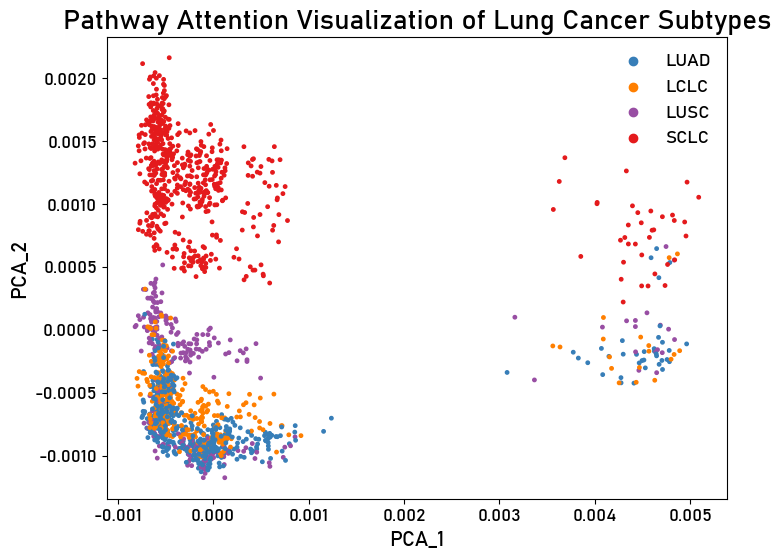

In [19]:
# 画出散点图，按照OncotreeCode进行着色
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(8, 6))
plt.scatter(x=df_pathway_att_pca['pca_1'], y=df_pathway_att_pca['pca_2'], c=df_pathway_att_pca['OncotreeCode'], s=6)
# Get the current axes, creating one if necessary.
# ax = plt.gca()
# Set the spines (the box) visibility
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['bottom'].set_linewidth(2)  # X轴线宽
# ax.spines['left'].set_linewidth(1)  # Y轴线宽
# ax.spines['bottom'].set_linewidth(1)
# 根据palette设置图例
for key, value in palette.items():
    plt.scatter([], [], c=value, label=key)
plt.legend(scatterpoints=1, frameon=False, labelspacing=0.5, loc='upper right', fontsize=13)


# title
plt.title('Pathway Attention Visualization of Lung Cancer Subtypes', fontsize=20)

# X轴：PCA1
plt.xlabel('PCA_1', fontsize=15)
# Y轴：PCA2
plt.ylabel('PCA_2', fontsize=15)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.savefig('LUNG_pathway_attention_PCA.png', dpi=300, bbox_inches='tight')

plt.show()

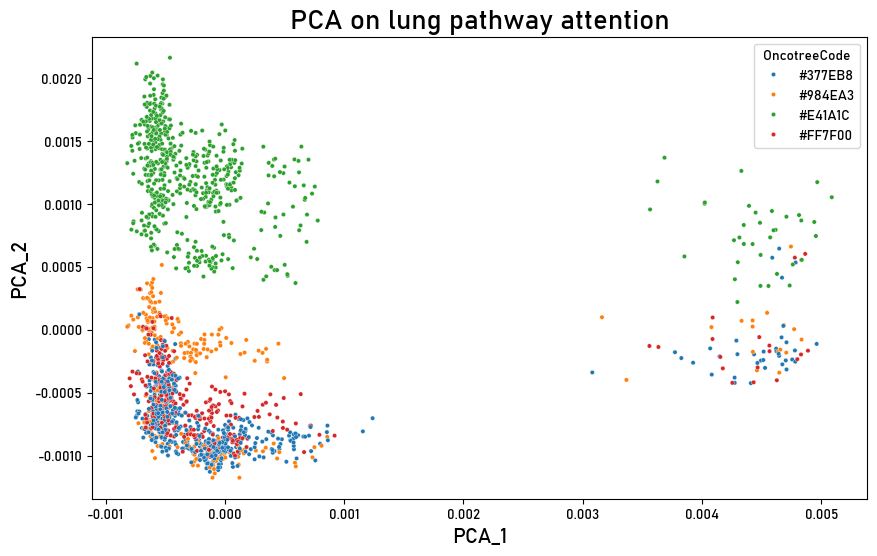

In [20]:
# 使用seaborn画图
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='OncotreeCode', data=df_pathway_att_pca, s=10)
# title
plt.title('PCA on lung pathway attention', fontsize=20)

# X轴：PCA1
plt.xlabel('PCA_1', fontsize=15)
# Y轴：PCA2
plt.ylabel('PCA_2', fontsize=15)

# plt.savefig('LUNG_pathway_attention_PCA_seaborn.png', dpi=300, bbox_inches='tight')

plt.show()